## Import Libraries

In [12]:
# !pip install tensorflow
# !pip install opencv-python

import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from scipy.ndimage import zoom
from scipy import ndimage
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image


## Dataset Preprocessing

- Reshape to grayscale image &
- Split data into training and test sets
- Add emotional labels 

In [13]:
def read_png_to_gray_matrix(folder_path, processed_dataset):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)
            gray_matrix = image.convert('L')
            dic = {"label": label_generate(folder_path), "matrix": np.asarray(gray_matrix)}
            processed_dataset.append(dic)
    return processed_dataset

In [14]:

def label_generate(path):
    if path == train_data_path[0] or path == test_data_path[0]:
        label = "angry"
        return label
    if path == train_data_path[1] or path == test_data_path[1]:
        label = "disgust"
        return label
    if path == train_data_path[2] or path == test_data_path[2]:
        label = "fear"
        return label
    if path == train_data_path[3] or path == test_data_path[3]:
        label = "happy"
        return label
    if path == train_data_path[4] or path == test_data_path[4]:
        label = "neutral"
        return label
    if path == train_data_path[5] or path == test_data_path[5]:
        label = "sad"
        return label
    if path == train_data_path[6] or path == test_data_path[6]:
        label = "surprise"
        return label
    else:
        raise ValueError("Invalid path")


In [15]:
train_data_path = [
    '../setData/original_data_set/train/angry',
    '../setData/original_data_set/train/disgust',
    '../setData/original_data_set/train/fear',
    '../setData/original_data_set/train/happy',
    '../setData/original_data_set/train/neutral',
    '../setData/original_data_set/train/sad',
    '../setData/original_data_set/train/surprise'
]

test_data_path = [
    '../setData/original_data_set/test/angry',
    '../setData/original_data_set/test/disgust',
    '../setData/original_data_set/test/fear',
    '../setData/original_data_set/test/happy',
    '../setData/original_data_set/test/neutral',
    '../setData/original_data_set/test/sad',
    '../setData/original_data_set/test/surprise'
]


In [23]:
def process_train_data(train_data_path, write_path="../setData/processed_data_set/train/data.npy", test=True):
    processed_dataset = []
    for path in train_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)
       
    # Data Augmentation setting
    aug_data = []
    setMovement = True
    setSpin = True
    setFlip = True
    setZoom = True
    
    # move 10% of the data
    for data in processed_dataset:
        if setMovement:
            if random.randint(0,99) <= 10:
                moved_data = data
                offset_x = np.random.randint(-5, 5)
                offset_y = np.random.randint(-5, 5)
                moved_data["matrix"] = np.roll(data["matrix"], (offset_x, offset_y), axis=(0, 1))
                aug_data.append(moved_data)
        
    # rotate 10% of the data
    for data in processed_dataset:
        if setSpin:
            if random.randint(0,99) <= 10:
                spin_data = data
                angle = np.random.randint(-5, 5)
                spin_data["matrix"] = ndimage.rotate(data["matrix"], angle, reshape=False)
                aug_data.append(spin_data)
                
    # flip 10% of the data
    for data in processed_dataset:
        if setFlip:
            if random.randint(0,99) <= 10:
                flip_data = data
                flip_data["matrix"] = np.flip(data["matrix"], axis=1)
                aug_data.append(flip_data)
                
    # zoom 10% of the data
    for data in processed_dataset:
        if setZoom:
            if random.randint(0, 99) <= 10:
                original_size = 48
                scale_factor = np.random.uniform(1, 1.2)
                new_size = int(original_size * scale_factor)
                zoom_data = data
                resized_matrix = cv2.resize(data["matrix"], (new_size, new_size), interpolation=cv2.INTER_LINEAR)
                start = (new_size - original_size) // 2
                end = start + original_size
                cropped_matrix = resized_matrix[start:end, start:end]
                zoom_data["matrix"] = cropped_matrix
                aug_data.append(zoom_data)
    
    # merge dataset
    processed_dataset = processed_dataset + aug_data
    
    # Shuffle the training dataset
    np.random.shuffle(processed_dataset)

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])
        print(check[5:])


def process_test_data(test_data_path, write_path="../setData/processed_data_set/test/data.npy", test=False):
    processed_dataset = []
    for path in test_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Optionally shuffle the test dataset - usually, you wouldn't shuffle test data
    # np.random.shuffle(processed_dataset) # Commenting this out as it's typically not done for test sets

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])

In [24]:
process_train_data(train_data_path)
process_test_data(test_data_path)

[{'label': 'sad', 'matrix': array([[254, 220, 127, ..., 150, 151, 147],
        [255, 219, 115, ..., 149, 151, 149],
        [255, 210, 112, ..., 144, 148, 149],
        ...,
        [119, 103,  90, ..., 248, 249, 252],
        [102,  93,  87, ..., 251, 243, 251],
        [101,  91,  90, ..., 248, 250, 239]], dtype=uint8)}
 {'label': 'angry', 'matrix': array([[113, 111, 115, ...,  84, 116, 117],
        [113, 113, 114, ...,  87, 109, 116],
        [111, 114, 114, ...,  94,  92, 117],
        ...,
        [ 87,  86,  76, ..., 110, 127, 130],
        [ 84,  80,  61, ...,  97, 122, 131],
        [ 83,  73,  63, ...,  80, 117, 129]], dtype=uint8)}
 {'label': 'neutral', 'matrix': array([[244, 241, 242, ..., 251, 237, 243],
        [237, 239, 238, ..., 242, 238, 238],
        [243, 238, 241, ..., 238, 244, 239],
        ...,
        [242, 242, 243, ..., 239, 244, 242],
        [237, 239, 240, ..., 242, 242, 242],
        [240, 240, 243, ..., 248, 241, 244]], dtype=uint8)}
 {'label': 'angry',

## Dataset Visualization

In [25]:
# load training data from dataset
data_path = "../setData/processed_data_set/train/data.npy"
data = np.load(data_path, allow_pickle=True)

# convert dataset to dataframe
df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in data])

# check traning dataset shape & preview first 5 rows of training data
df.shape
df.head(5)


,emotion,pixels
0,sad,"[254, 220, 127, 138, 131, 133, 127, 121, 118, ..."
1,angry,"[113, 111, 115, 118, 114, 122, 102, 74, 100, 1..."
2,neutral,"[244, 241, 242, 242, 243, 243, 239, 248, 178, ..."
3,angry,"[140, 158, 164, 158, 158, 156, 154, 157, 151, ..."
4,sad,"[0, 0, 160, 216, 226, 199, 196, 188, 188, 176,..."


In [26]:
emotion_counts = df['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'number']
print(emotion_counts)

    emotion  number
0     happy   10450
1   neutral    7133
2       sad    7021
3      fear    5993
4     angry    5728
5  surprise    4543
6   disgust     637


/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_25601/1779081672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


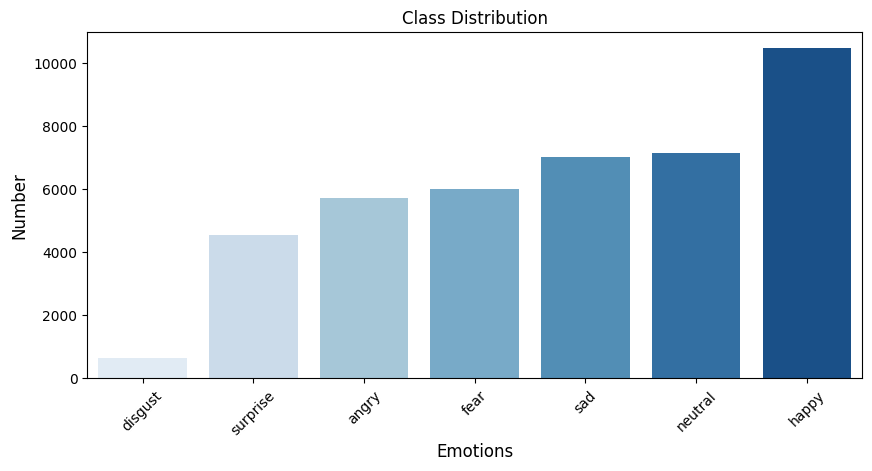

In [27]:
# Sort emotions by the number of images
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

# Plotting the bar graph with sorted emotions and gradient colors
plt.figure(figsize=(10, 4.5))
sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.xticks(rotation=45) # If necessary, to improve label readability
plt.show()

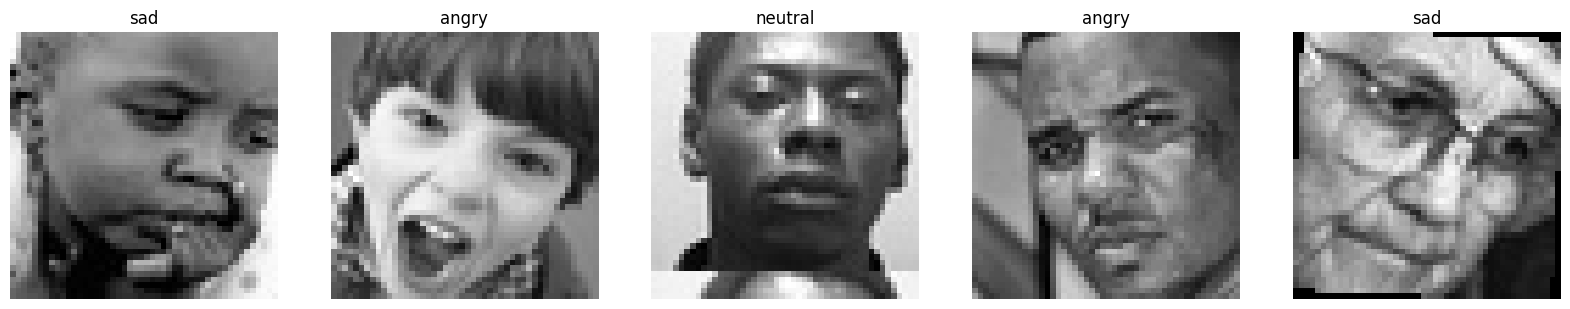

In [28]:
# Function to plot the first 5 images and their labels
def plot_first_five_images(df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4)) # Creates a figure with 5 subplots
    for i, ax in enumerate(axes.flat):
        # Assuming the images are square, compute the size for reshape
        img_size = int(len(df['pixels'].iloc[i]) ** 0.5)
        img = df['pixels'].iloc[i].reshape(img_size, img_size)
        
        ax.imshow(img, cmap='gray') # Display an image in grayscale
        ax.set_title(df['emotion'].iloc[i]) # Set the title to the image's emotion
        ax.axis('off') # Hide the axes ticks

    plt.show()

# Assuming df is your DataFrame containing the data
plot_first_five_images(df)

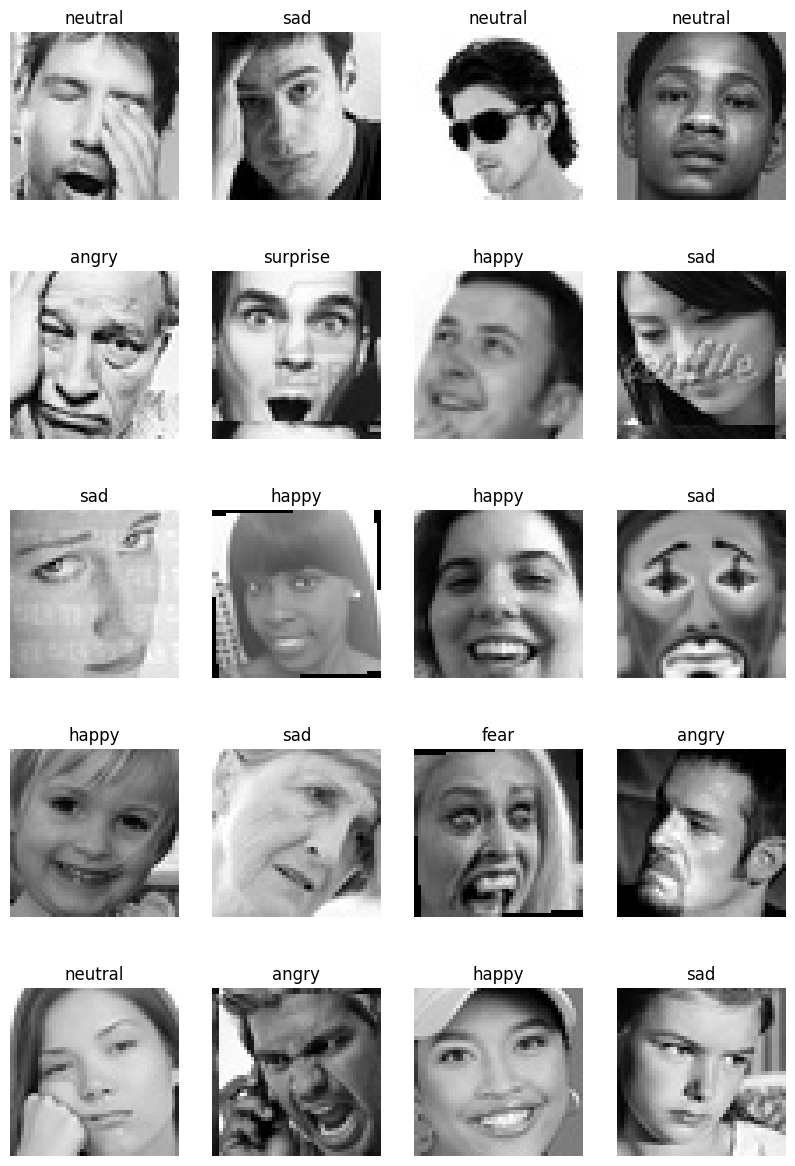

In [29]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize=(10, 15))
columns = 4
rows = 5

# Iterate to display images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    # Randomly select an index from the DataFrame
    random_index = random.randint(0, len(df) - 1)
    img = df.iloc[random_index]['pixels'].reshape(48,48)
    emotion = df.iloc[random_index]['emotion']
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')  

plt.show()

## CNN Model

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [33]:
# CNN model
def cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # Convolutional and pooling layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flattening the 3D outputs to 1D and adding dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Label to number mapping
def label_generate(label):
    labels_dict = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, 
                   "neutral": 4, "sad": 5, "surprise": 6}
    return labels_dict.get(label, None)


In [34]:
# Model parameters
input_shape = (48, 48, 1)
num_classes = 7

# Build the CNN model
model = cnn_model(input_shape, num_classes)

# Load data (paths may need to be adjusted based on your directory structure)
train_data_path = "../setData/processed_data_set/train/data.npy"
train_data = np.load(train_data_path, allow_pickle=True)
test_data_path = "../setData/processed_data_set/test/data.npy"
test_data = np.load(test_data_path, allow_pickle=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare the data for training
image_matrix = np.array([item['matrix'] for item in train_data]).reshape(-1, 48, 48, 1)
labels = np.array([label_generate(item['label']) for item in train_data])
test_image_matrix = np.array([item['matrix'] for item in test_data]).reshape(-1, 48, 48, 1)
test_labels = np.array([label_generate(item['label']) for item in test_data])


/Users/ericsheng495/anaconda3/envs/facial-recog/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [35]:
# Train the model
history = model.fit(image_matrix, labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(test_image_matrix, test_labels))

# Save the model
model.save("model/trained_cnn_model.h5")

Epoch 1/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.2358 - loss: 2.2776 - val_accuracy: 0.3908 - val_loss: 1.5953
Epoch 2/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.3830 - loss: 1.5790 - val_accuracy: 0.4565 - val_loss: 1.4206
Epoch 3/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4465 - loss: 1.4442 - val_accuracy: 0.4958 - val_loss: 1.3244
Epoch 4/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4876 - loss: 1.3508 - val_accuracy: 0.5131 - val_loss: 1.2844
Epoch 5/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5270 - loss: 1.2627 - val_accuracy: 0.5258 - val_loss: 1.2548
Epoch 6/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5518 - loss: 1.1968 - val_accuracy: 0.5148 - val_loss: 1.2821
Epoch 7/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5823 - loss: 1.1209 - val_accuracy: 0.5347 - val_loss: 1.2635
Epoch 8/30
649/649 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6143 - loss: 1.0461 - 

## Model Evaluation

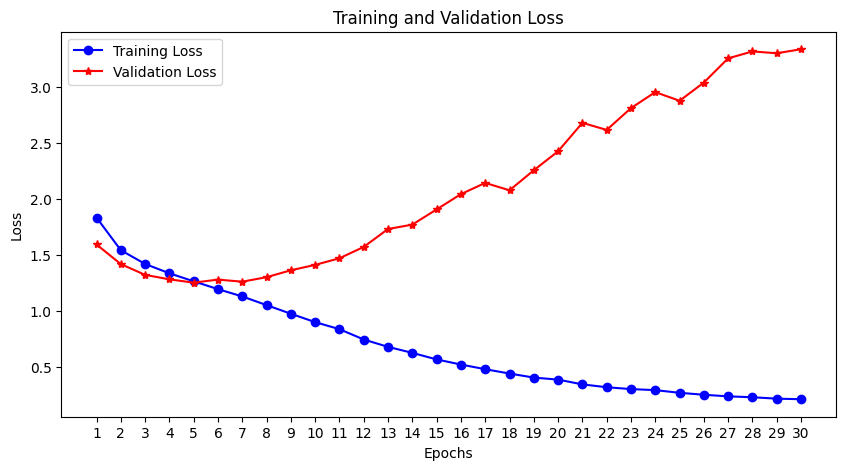

In [36]:
import matplotlib.pyplot as plt

# Plotting the loss for every 5th epoch
epochs = range(1, len(history.history['loss']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs[::1])  # Show only every 5th epoch
plt.legend()
plt.show()

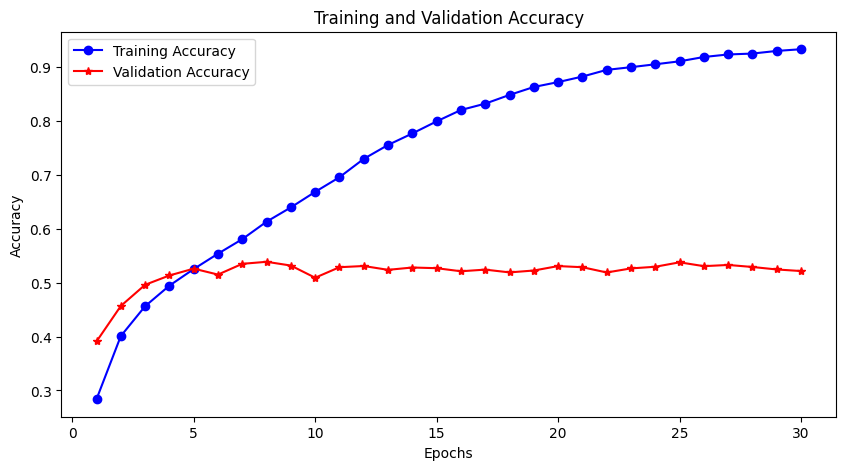

In [37]:
# Plotting the accuracy for each epoch
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()